In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Regression Model
from tensorflow.keras.optimizers import RMSprop

In [29]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Returns count of missing data in each column
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Pre-Processing


In [31]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(insurance_data['sex'])

LabelEncoder()

In [33]:
insurance_data['sex'] = le.transform(insurance_data['sex'])

In [34]:
insurance_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [35]:
le.fit(insurance_data['smoker'])
insurance_data['smoker'] = le.transform(insurance_data['smoker'])

In [36]:
le.fit(insurance_data['region'])
insurance_data['region'] = le.transform(insurance_data['region'])

Handling Outliers

In [37]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


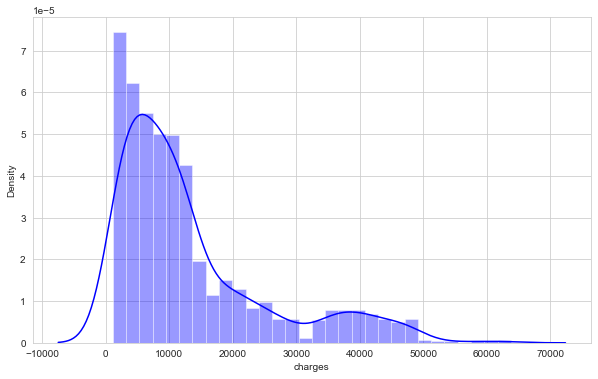

In [38]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(insurance_data['charges'], color = 'b')
plt.show()

In [40]:
from scipy.stats import zscore

In [42]:
insurance_data[np.abs(zscore(insurance_data['charges'])) > 3].index

Int64Index([34, 543, 577, 819, 1146, 1230, 1300], dtype='int64')

In [13]:
X = insurance_data.drop(['charges'], axis = 1)
Y = insurance_data['charges']

Train & Test Data

In [43]:
X = insurance_data.drop('charges', axis = 1)
Y = insurance_data['charges']

ANN Regressor Model

In [44]:
from sklearn.model_selection import train_test_split
# splitting data into train & test i.e. 80% & 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [16]:
model = build_model()

In [45]:
def build_model():
    model = Sequential()
    # units = num of neurons, input_shape = number of features
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 256, activation = 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 512, activation = 'relu'))
    # Output Layer - For Regression
    model.add(Dense(units = 1))
    # Optimizers (alpha)
    optimizers = RMSprop(learning_rate = 0.001)
    # Model Compilers
    model.compile(loss = 'mean_squared_error',optimizer=optimizers, metrics=['mean_squared_error',
                                                                             'mean_absolute_error'])
    return model

In [46]:
model = build_model()

In [47]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 166017 (648.50 KB)
Trainable params: 166017 (648.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# epochs = num of iterations, batch_size = sample size per iteration,
# validation_split = 20% (model test size), validation is done while training of model
history = model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

Epoch 1/600
29/29 [==============================] - 1s 15ms/step - loss: 267204160.0000 - mean_squared_error: 267204160.0000 - mean_absolute_error: 11371.0723 - val_loss: 236383952.0000 - val_mean_squared_error: 236383952.0000 - val_mean_absolute_error: 9691.6650
Epoch 2/600
29/29 [==============================] - 0s 8ms/step - loss: 143764512.0000 - mean_squared_error: 143764512.0000 - mean_absolute_error: 8016.2710 - val_loss: 150226304.0000 - val_mean_squared_error: 150226304.0000 - val_mean_absolute_error: 8982.4805
Epoch 3/600
29/29 [==============================] - 0s 7ms/step - loss: 124916792.0000 - mean_squared_error: 124916792.0000 - mean_absolute_error: 8672.2227 - val_loss: 142452320.0000 - val_mean_squared_error: 142452320.0000 - val_mean_absolute_error: 9816.9805
Epoch 4/600
29/29 [==============================] - 0s 7ms/step - loss: 124814648.0000 - mean_squared_error: 124814648.0000 - mean_absolute_error: 8812.6885 - val_loss: 143471744.0000 - val_mean_squared_error

29/29 [==============================] - 0s 6ms/step - loss: 91235664.0000 - mean_squared_error: 91235664.0000 - mean_absolute_error: 7485.9531 - val_loss: 106264768.0000 - val_mean_squared_error: 106264768.0000 - val_mean_absolute_error: 7853.9551
Epoch 33/600
29/29 [==============================] - 0s 6ms/step - loss: 85938896.0000 - mean_squared_error: 85938896.0000 - mean_absolute_error: 7253.8911 - val_loss: 101930208.0000 - val_mean_squared_error: 101930208.0000 - val_mean_absolute_error: 7330.6489
Epoch 34/600
29/29 [==============================] - 0s 6ms/step - loss: 80253848.0000 - mean_squared_error: 80253848.0000 - mean_absolute_error: 6870.3296 - val_loss: 92128080.0000 - val_mean_squared_error: 92128080.0000 - val_mean_absolute_error: 7246.5923
Epoch 35/600
29/29 [==============================] - 0s 6ms/step - loss: 73234664.0000 - mean_squared_error: 73234664.0000 - mean_absolute_error: 6555.7310 - val_loss: 89378456.0000 - val_mean_squared_error: 89378456.0000 - val_

29/29 [==============================] - 0s 6ms/step - loss: 35769756.0000 - mean_squared_error: 35769756.0000 - mean_absolute_error: 3926.7844 - val_loss: 46631212.0000 - val_mean_squared_error: 46631212.0000 - val_mean_absolute_error: 4526.9624
Epoch 64/600
29/29 [==============================] - 0s 6ms/step - loss: 34629008.0000 - mean_squared_error: 34629008.0000 - mean_absolute_error: 3837.1208 - val_loss: 58739328.0000 - val_mean_squared_error: 58739328.0000 - val_mean_absolute_error: 4298.1885
Epoch 65/600
29/29 [==============================] - 0s 6ms/step - loss: 34177952.0000 - mean_squared_error: 34177952.0000 - mean_absolute_error: 3777.4543 - val_loss: 49709700.0000 - val_mean_squared_error: 49709700.0000 - val_mean_absolute_error: 3975.7915
Epoch 66/600
29/29 [==============================] - 0s 6ms/step - loss: 35073948.0000 - mean_squared_error: 35073948.0000 - mean_absolute_error: 3851.9050 - val_loss: 46833508.0000 - val_mean_squared_error: 46833508.0000 - val_mean

29/29 [==============================] - 0s 6ms/step - loss: 31012612.0000 - mean_squared_error: 31012612.0000 - mean_absolute_error: 3575.0471 - val_loss: 42853036.0000 - val_mean_squared_error: 42853036.0000 - val_mean_absolute_error: 4444.1763
Epoch 95/600
29/29 [==============================] - 0s 6ms/step - loss: 30779514.0000 - mean_squared_error: 30779514.0000 - mean_absolute_error: 3525.2812 - val_loss: 43617548.0000 - val_mean_squared_error: 43617548.0000 - val_mean_absolute_error: 3957.6194
Epoch 96/600
29/29 [==============================] - 0s 6ms/step - loss: 31023246.0000 - mean_squared_error: 31023246.0000 - mean_absolute_error: 3530.9075 - val_loss: 44655552.0000 - val_mean_squared_error: 44655552.0000 - val_mean_absolute_error: 3822.8245
Epoch 97/600
29/29 [==============================] - 0s 6ms/step - loss: 30591914.0000 - mean_squared_error: 30591914.0000 - mean_absolute_error: 3474.2107 - val_loss: 49934220.0000 - val_mean_squared_error: 49934220.0000 - val_mean

29/29 [==============================] - 0s 6ms/step - loss: 27405608.0000 - mean_squared_error: 27405608.0000 - mean_absolute_error: 3230.5933 - val_loss: 40967200.0000 - val_mean_squared_error: 40967200.0000 - val_mean_absolute_error: 5008.2476
Epoch 126/600
29/29 [==============================] - 0s 6ms/step - loss: 26529260.0000 - mean_squared_error: 26529260.0000 - mean_absolute_error: 3176.8276 - val_loss: 40252072.0000 - val_mean_squared_error: 40252072.0000 - val_mean_absolute_error: 3587.9731
Epoch 127/600
29/29 [==============================] - 0s 6ms/step - loss: 26534936.0000 - mean_squared_error: 26534936.0000 - mean_absolute_error: 3153.3052 - val_loss: 38960308.0000 - val_mean_squared_error: 38960308.0000 - val_mean_absolute_error: 4092.7781
Epoch 128/600
29/29 [==============================] - 0s 6ms/step - loss: 26329282.0000 - mean_squared_error: 26329282.0000 - mean_absolute_error: 3140.1409 - val_loss: 40784852.0000 - val_mean_squared_error: 40784852.0000 - val_m

29/29 [==============================] - 0s 5ms/step - loss: 23088946.0000 - mean_squared_error: 23088946.0000 - mean_absolute_error: 2789.2021 - val_loss: 35715348.0000 - val_mean_squared_error: 35715348.0000 - val_mean_absolute_error: 3794.8352
Epoch 157/600
29/29 [==============================] - 0s 6ms/step - loss: 22955852.0000 - mean_squared_error: 22955852.0000 - mean_absolute_error: 2840.5706 - val_loss: 40187388.0000 - val_mean_squared_error: 40187388.0000 - val_mean_absolute_error: 3230.1443
Epoch 158/600
29/29 [==============================] - 0s 6ms/step - loss: 22588504.0000 - mean_squared_error: 22588504.0000 - mean_absolute_error: 2818.4871 - val_loss: 35699088.0000 - val_mean_squared_error: 35699088.0000 - val_mean_absolute_error: 4218.5225
Epoch 159/600
29/29 [==============================] - 0s 6ms/step - loss: 23299356.0000 - mean_squared_error: 23299356.0000 - mean_absolute_error: 2879.2705 - val_loss: 36629924.0000 - val_mean_squared_error: 36629924.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 21297396.0000 - mean_squared_error: 21297396.0000 - mean_absolute_error: 2705.8274 - val_loss: 38018972.0000 - val_mean_squared_error: 38018972.0000 - val_mean_absolute_error: 3181.9482
Epoch 188/600
29/29 [==============================] - 0s 6ms/step - loss: 21240386.0000 - mean_squared_error: 21240386.0000 - mean_absolute_error: 2715.9434 - val_loss: 36709332.0000 - val_mean_squared_error: 36709332.0000 - val_mean_absolute_error: 3167.5681
Epoch 189/600
29/29 [==============================] - 0s 6ms/step - loss: 21716972.0000 - mean_squared_error: 21716972.0000 - mean_absolute_error: 2715.4321 - val_loss: 38445980.0000 - val_mean_squared_error: 38445980.0000 - val_mean_absolute_error: 3053.9648
Epoch 190/600
29/29 [==============================] - 0s 6ms/step - loss: 21129696.0000 - mean_squared_error: 21129696.0000 - mean_absolute_error: 2668.3359 - val_loss: 36738568.0000 - val_mean_squared_error: 36738568.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 21895578.0000 - mean_squared_error: 21895578.0000 - mean_absolute_error: 2728.9536 - val_loss: 36237048.0000 - val_mean_squared_error: 36237048.0000 - val_mean_absolute_error: 3434.7803
Epoch 219/600
29/29 [==============================] - 0s 6ms/step - loss: 20739792.0000 - mean_squared_error: 20739792.0000 - mean_absolute_error: 2650.6863 - val_loss: 38674772.0000 - val_mean_squared_error: 38674772.0000 - val_mean_absolute_error: 3137.8433
Epoch 220/600
29/29 [==============================] - 0s 6ms/step - loss: 21201698.0000 - mean_squared_error: 21201698.0000 - mean_absolute_error: 2744.0674 - val_loss: 36650256.0000 - val_mean_squared_error: 36650256.0000 - val_mean_absolute_error: 3400.9500
Epoch 221/600
29/29 [==============================] - 0s 6ms/step - loss: 21551810.0000 - mean_squared_error: 21551810.0000 - mean_absolute_error: 2679.4707 - val_loss: 34876532.0000 - val_mean_squared_error: 34876532.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 20885984.0000 - mean_squared_error: 20885984.0000 - mean_absolute_error: 2641.7585 - val_loss: 39665912.0000 - val_mean_squared_error: 39665912.0000 - val_mean_absolute_error: 3059.3606
Epoch 250/600
29/29 [==============================] - 0s 6ms/step - loss: 20442476.0000 - mean_squared_error: 20442476.0000 - mean_absolute_error: 2625.5300 - val_loss: 46522852.0000 - val_mean_squared_error: 46522852.0000 - val_mean_absolute_error: 3414.6836
Epoch 251/600
29/29 [==============================] - 0s 6ms/step - loss: 21178504.0000 - mean_squared_error: 21178504.0000 - mean_absolute_error: 2716.7468 - val_loss: 44091460.0000 - val_mean_squared_error: 44091460.0000 - val_mean_absolute_error: 3326.5356
Epoch 252/600
29/29 [==============================] - 0s 6ms/step - loss: 20308358.0000 - mean_squared_error: 20308358.0000 - mean_absolute_error: 2577.8916 - val_loss: 39094608.0000 - val_mean_squared_error: 39094608.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 20621234.0000 - mean_squared_error: 20621234.0000 - mean_absolute_error: 2641.9670 - val_loss: 44616016.0000 - val_mean_squared_error: 44616016.0000 - val_mean_absolute_error: 3342.2175
Epoch 281/600
29/29 [==============================] - 0s 6ms/step - loss: 20587896.0000 - mean_squared_error: 20587896.0000 - mean_absolute_error: 2611.9053 - val_loss: 36569732.0000 - val_mean_squared_error: 36569732.0000 - val_mean_absolute_error: 4649.1792
Epoch 282/600
29/29 [==============================] - 0s 6ms/step - loss: 20103770.0000 - mean_squared_error: 20103770.0000 - mean_absolute_error: 2679.5857 - val_loss: 36252824.0000 - val_mean_squared_error: 36252824.0000 - val_mean_absolute_error: 3612.8198
Epoch 283/600
29/29 [==============================] - 0s 5ms/step - loss: 20487992.0000 - mean_squared_error: 20487992.0000 - mean_absolute_error: 2682.1016 - val_loss: 39809476.0000 - val_mean_squared_error: 39809476.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 20383856.0000 - mean_squared_error: 20383856.0000 - mean_absolute_error: 2632.1919 - val_loss: 36909904.0000 - val_mean_squared_error: 36909904.0000 - val_mean_absolute_error: 4098.8110
Epoch 312/600
29/29 [==============================] - 0s 6ms/step - loss: 20281872.0000 - mean_squared_error: 20281872.0000 - mean_absolute_error: 2635.0081 - val_loss: 37310532.0000 - val_mean_squared_error: 37310540.0000 - val_mean_absolute_error: 3282.0625
Epoch 313/600
29/29 [==============================] - 0s 7ms/step - loss: 20346186.0000 - mean_squared_error: 20346186.0000 - mean_absolute_error: 2608.4062 - val_loss: 37345300.0000 - val_mean_squared_error: 37345300.0000 - val_mean_absolute_error: 3339.8152
Epoch 314/600
29/29 [==============================] - 0s 6ms/step - loss: 20092170.0000 - mean_squared_error: 20092170.0000 - mean_absolute_error: 2589.7778 - val_loss: 39776176.0000 - val_mean_squared_error: 39776176.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 19869578.0000 - mean_squared_error: 19869578.0000 - mean_absolute_error: 2596.8235 - val_loss: 44801700.0000 - val_mean_squared_error: 44801700.0000 - val_mean_absolute_error: 3380.0129
Epoch 343/600
29/29 [==============================] - 0s 6ms/step - loss: 20157736.0000 - mean_squared_error: 20157736.0000 - mean_absolute_error: 2643.2732 - val_loss: 39403852.0000 - val_mean_squared_error: 39403852.0000 - val_mean_absolute_error: 3075.3872
Epoch 344/600
29/29 [==============================] - 0s 6ms/step - loss: 20195902.0000 - mean_squared_error: 20195902.0000 - mean_absolute_error: 2590.2056 - val_loss: 36142928.0000 - val_mean_squared_error: 36142928.0000 - val_mean_absolute_error: 4141.7598
Epoch 345/600
29/29 [==============================] - 0s 6ms/step - loss: 19659456.0000 - mean_squared_error: 19659456.0000 - mean_absolute_error: 2649.0999 - val_loss: 46732244.0000 - val_mean_squared_error: 46732244.0000 - val_m

29/29 [==============================] - 0s 7ms/step - loss: 19947692.0000 - mean_squared_error: 19947692.0000 - mean_absolute_error: 2575.3196 - val_loss: 35216640.0000 - val_mean_squared_error: 35216640.0000 - val_mean_absolute_error: 3728.1819
Epoch 374/600
29/29 [==============================] - 0s 7ms/step - loss: 20138364.0000 - mean_squared_error: 20138364.0000 - mean_absolute_error: 2630.3420 - val_loss: 35573348.0000 - val_mean_squared_error: 35573348.0000 - val_mean_absolute_error: 4342.5068
Epoch 375/600
29/29 [==============================] - 0s 7ms/step - loss: 20100002.0000 - mean_squared_error: 20100002.0000 - mean_absolute_error: 2683.3516 - val_loss: 37222024.0000 - val_mean_squared_error: 37222024.0000 - val_mean_absolute_error: 3185.2415
Epoch 376/600
29/29 [==============================] - 0s 7ms/step - loss: 19846446.0000 - mean_squared_error: 19846446.0000 - mean_absolute_error: 2640.6265 - val_loss: 36889740.0000 - val_mean_squared_error: 36889736.0000 - val_m

29/29 [==============================] - 0s 5ms/step - loss: 20534080.0000 - mean_squared_error: 20534080.0000 - mean_absolute_error: 2630.8040 - val_loss: 34924676.0000 - val_mean_squared_error: 34924676.0000 - val_mean_absolute_error: 4173.1958
Epoch 405/600
29/29 [==============================] - 0s 6ms/step - loss: 19613002.0000 - mean_squared_error: 19613002.0000 - mean_absolute_error: 2630.3972 - val_loss: 40695140.0000 - val_mean_squared_error: 40695140.0000 - val_mean_absolute_error: 3227.4749
Epoch 406/600
29/29 [==============================] - 0s 6ms/step - loss: 19900166.0000 - mean_squared_error: 19900166.0000 - mean_absolute_error: 2625.0879 - val_loss: 36554768.0000 - val_mean_squared_error: 36554768.0000 - val_mean_absolute_error: 3115.5835
Epoch 407/600
29/29 [==============================] - 0s 6ms/step - loss: 19895726.0000 - mean_squared_error: 19895726.0000 - mean_absolute_error: 2551.4905 - val_loss: 38059904.0000 - val_mean_squared_error: 38059904.0000 - val_m

29/29 [==============================] - 0s 5ms/step - loss: 19532444.0000 - mean_squared_error: 19532444.0000 - mean_absolute_error: 2523.7446 - val_loss: 34296824.0000 - val_mean_squared_error: 34296824.0000 - val_mean_absolute_error: 3767.0845
Epoch 436/600
29/29 [==============================] - 0s 6ms/step - loss: 19092800.0000 - mean_squared_error: 19092800.0000 - mean_absolute_error: 2554.5151 - val_loss: 37517608.0000 - val_mean_squared_error: 37517608.0000 - val_mean_absolute_error: 3035.0344
Epoch 437/600
29/29 [==============================] - 0s 6ms/step - loss: 19378870.0000 - mean_squared_error: 19378870.0000 - mean_absolute_error: 2585.1643 - val_loss: 41281340.0000 - val_mean_squared_error: 41281340.0000 - val_mean_absolute_error: 3294.7322
Epoch 438/600
29/29 [==============================] - 0s 6ms/step - loss: 19414336.0000 - mean_squared_error: 19414336.0000 - mean_absolute_error: 2549.5029 - val_loss: 39047488.0000 - val_mean_squared_error: 39047488.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 19292008.0000 - mean_squared_error: 19292008.0000 - mean_absolute_error: 2527.7649 - val_loss: 39488088.0000 - val_mean_squared_error: 39488088.0000 - val_mean_absolute_error: 3399.3203
Epoch 467/600
29/29 [==============================] - 0s 6ms/step - loss: 19019060.0000 - mean_squared_error: 19019060.0000 - mean_absolute_error: 2514.0845 - val_loss: 37613488.0000 - val_mean_squared_error: 37613488.0000 - val_mean_absolute_error: 3869.5757
Epoch 468/600
29/29 [==============================] - 0s 6ms/step - loss: 19472482.0000 - mean_squared_error: 19472482.0000 - mean_absolute_error: 2622.5383 - val_loss: 38693516.0000 - val_mean_squared_error: 38693516.0000 - val_mean_absolute_error: 3588.9692
Epoch 469/600
29/29 [==============================] - 0s 6ms/step - loss: 19240434.0000 - mean_squared_error: 19240434.0000 - mean_absolute_error: 2595.5918 - val_loss: 35029168.0000 - val_mean_squared_error: 35029168.0000 - val_m

29/29 [==============================] - 0s 5ms/step - loss: 20021874.0000 - mean_squared_error: 20021874.0000 - mean_absolute_error: 2591.8755 - val_loss: 38417876.0000 - val_mean_squared_error: 38417876.0000 - val_mean_absolute_error: 3162.3169
Epoch 498/600
29/29 [==============================] - 0s 6ms/step - loss: 19062418.0000 - mean_squared_error: 19062418.0000 - mean_absolute_error: 2489.9797 - val_loss: 34536756.0000 - val_mean_squared_error: 34536756.0000 - val_mean_absolute_error: 3779.8135
Epoch 499/600
29/29 [==============================] - 0s 6ms/step - loss: 19443640.0000 - mean_squared_error: 19443640.0000 - mean_absolute_error: 2602.0500 - val_loss: 39946384.0000 - val_mean_squared_error: 39946384.0000 - val_mean_absolute_error: 3172.7100
Epoch 500/600
29/29 [==============================] - 0s 6ms/step - loss: 18895138.0000 - mean_squared_error: 18895138.0000 - mean_absolute_error: 2497.8301 - val_loss: 37736644.0000 - val_mean_squared_error: 37736644.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 18698314.0000 - mean_squared_error: 18698314.0000 - mean_absolute_error: 2488.7559 - val_loss: 37939956.0000 - val_mean_squared_error: 37939956.0000 - val_mean_absolute_error: 3718.9109
Epoch 529/600
29/29 [==============================] - 0s 6ms/step - loss: 18813974.0000 - mean_squared_error: 18813974.0000 - mean_absolute_error: 2576.9961 - val_loss: 37076524.0000 - val_mean_squared_error: 37076524.0000 - val_mean_absolute_error: 3281.4937
Epoch 530/600
29/29 [==============================] - 0s 6ms/step - loss: 18767608.0000 - mean_squared_error: 18767608.0000 - mean_absolute_error: 2538.9741 - val_loss: 34130952.0000 - val_mean_squared_error: 34130952.0000 - val_mean_absolute_error: 3699.0361
Epoch 531/600
29/29 [==============================] - 0s 6ms/step - loss: 19010598.0000 - mean_squared_error: 19010598.0000 - mean_absolute_error: 2569.8552 - val_loss: 35679700.0000 - val_mean_squared_error: 35679700.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 18470134.0000 - mean_squared_error: 18470134.0000 - mean_absolute_error: 2471.9871 - val_loss: 35684404.0000 - val_mean_squared_error: 35684404.0000 - val_mean_absolute_error: 4508.4722
Epoch 560/600
29/29 [==============================] - 0s 5ms/step - loss: 19431396.0000 - mean_squared_error: 19431396.0000 - mean_absolute_error: 2617.6650 - val_loss: 34477976.0000 - val_mean_squared_error: 34477976.0000 - val_mean_absolute_error: 3395.5085
Epoch 561/600
29/29 [==============================] - 0s 6ms/step - loss: 18997494.0000 - mean_squared_error: 18997494.0000 - mean_absolute_error: 2520.5369 - val_loss: 37187028.0000 - val_mean_squared_error: 37187028.0000 - val_mean_absolute_error: 3365.3108
Epoch 562/600
29/29 [==============================] - 0s 6ms/step - loss: 18470004.0000 - mean_squared_error: 18470004.0000 - mean_absolute_error: 2555.4541 - val_loss: 35373588.0000 - val_mean_squared_error: 35373588.0000 - val_m

29/29 [==============================] - 0s 6ms/step - loss: 18399114.0000 - mean_squared_error: 18399114.0000 - mean_absolute_error: 2567.7888 - val_loss: 38396044.0000 - val_mean_squared_error: 38396044.0000 - val_mean_absolute_error: 3110.6069
Epoch 591/600
29/29 [==============================] - 0s 6ms/step - loss: 18153518.0000 - mean_squared_error: 18153518.0000 - mean_absolute_error: 2477.0437 - val_loss: 36260720.0000 - val_mean_squared_error: 36260720.0000 - val_mean_absolute_error: 3698.5220
Epoch 592/600
29/29 [==============================] - 0s 6ms/step - loss: 19012642.0000 - mean_squared_error: 19012642.0000 - mean_absolute_error: 2577.4780 - val_loss: 38225040.0000 - val_mean_squared_error: 38225040.0000 - val_mean_absolute_error: 3340.9150
Epoch 593/600
29/29 [==============================] - 0s 6ms/step - loss: 18787216.0000 - mean_squared_error: 18787216.0000 - mean_absolute_error: 2485.2495 - val_loss: 34738316.0000 - val_mean_squared_error: 34738316.0000 - val_m

In [49]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,267204160.0,267204160.0,11371.072266,236383952.0,236383952.0,9691.665039
1,143764512.0,143764512.0,8016.270996,150226304.0,150226304.0,8982.480469
2,124916792.0,124916792.0,8672.222656,142452320.0,142452320.0,9816.980469
3,124814648.0,124814648.0,8812.688477,143471744.0,143471744.0,9471.458008
4,124885136.0,124885136.0,8805.650391,147992864.0,147992864.0,9015.518555
...,...,...,...,...,...,...
595,18770040.0,18770040.0,2545.177002,36688844.0,36688844.0,3462.543213
596,18599480.0,18599480.0,2508.970215,36707792.0,36707796.0,3326.156006
597,18752820.0,18752820.0,2526.486084,38556264.0,38556268.0,3128.196533
598,18927858.0,18927858.0,2520.506348,33391894.0,33391894.0,3700.906006


<AxesSubplot:>

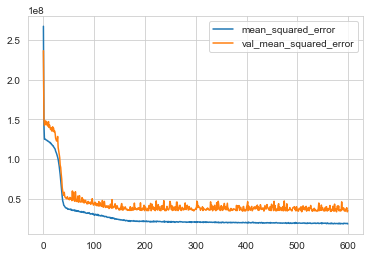

In [50]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [51]:
# Yhat
predictions = model.predict(x_test)

9/9 [==============================] - 0s 4ms/step


In [52]:
from sklearn.metrics import r2_score
# 0-1
r2_score(y_test, predictions)

0.8729564473106304

In [53]:
results = pd.DataFrame(predictions, columns = ['Predicted_Value'])

In [54]:
results['Actual_Value'] = np.array(y_test)

<AxesSubplot:>

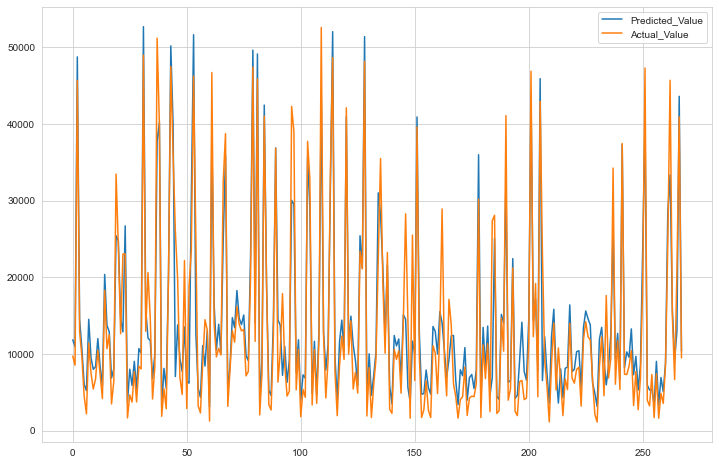

In [55]:
results.plot(figsize=(12,8))